<a href="https://colab.research.google.com/github/mysoniw/tensor-flow/blob/master/KoNLPy%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%A0%95_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!cat ./ratings_test.txt | head -n 10

id	document	label
6270596	굳 ㅋ	1
9274899	GDNTOPCLASSINTHECLUB	0
8544678	뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아	0
6825595	지루하지는 않은데 완전 막장임... 돈주고 보기에는....	0
6723715	3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??	0
7898805	음악이 주가 된, 최고의 음악영화	1
6315043	진정한 쓰레기	0
6097171	마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다	0
8932678	갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다	0


In [4]:
!cat ./ratings_test.txt | tail -n 10

9757200	제발 국뽕김치영화좀 그만 만들어라...	0
9653062	재밌는데....?평점이왜?	1
1077821	내일 토요일밤 MBC에서 영화 해준다.... 봐야지... 기대	1
5494272	액션영화로 기대하지말고 스릴러영화라 생각하고 보면 괜찮은 영화인듯^^	1
5567676	정말 너무 재밌음 ㅋ	1
4608761	오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함	1
5308387	의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO	0
9072549	그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다	0
5802125	절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네	0
6070594	마무리는 또 왜이래	0


In [0]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('./ratings_train.txt')
test_data = read_data('./ratings_test.txt')

In [3]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [4]:
!pip install konlpy

    100% |████████████████████████████████| 19.4MB 2.5MB/s 
    100% |████████████████████████████████| 174kB 32.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [5]:
import konlpy

konlpy.__version__

'0.5.1'

In [0]:
from konlpy.tag import Okt

In [7]:
okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


- json 분석

In [0]:
import json
import os
from pprint import pprint

정규화 스템은 근어로 표시

In [0]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]


형태소 분석을 통해 품사를 태깅해주는 작업

In [10]:
if os.path.isfile('./train_docs.json'):
    with open('./train_docs.json') as f:
        train_docs = json.load(f)
    with open('./test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('./train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('./test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])


(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')


#  length of tokens


In [11]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


이제 이 데이터를 nltk 라이브러리를 통해서 전처리를 해볼텐데요, Text 클래스는 문서를 편리하게 탐색할 수 있는 다양한 기능을 제공합니다.
여기에서는 vocab().most_common 메서드를 이용해서 데이터에서 가장 자주 사용되는 단어를 가져올 때 사용하겠습니다.

In [75]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [76]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159921
49895
[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [14]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 10 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [15]:
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
fontconfig set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [16]:
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [17]:
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/distpackages/matplotlib/mpl-data/fonts/ttf/

cp: target '/usr/local/lib/python3.6/distpackages/matplotlib/mpl-data/fonts/ttf/' is not a directory


In [18]:
!ls /usr/local/lib/python3.6/distpackages/matplotlib/ -al

ls: cannot access '/usr/local/lib/python3.6/distpackages/matplotlib/': No such file or directory


In [19]:
!ls -al /usr/share/fonts/truetype/nanum/Nanum*


-rw-r--r-- 1 root root  4413912 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root  4917332 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
-rw-r--r-- 1 root root  4184028 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
-rw-r--r-- 1 root root  4790084 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
-rw-r--r-- 1 root root 10028540 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
-rw-r--r-- 1 root root 11033840 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
-rw-r--r-- 1 root root  3745376 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumBrush.ttf
-rw-r--r-- 1 root root  4642244 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
-rw-r--r-- 1 root root  1800792 Oct 21  2016 /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
-rw-r--r-- 1 root root  2779112 Oct 21  2016 /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
-rw-r

In [0]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [0]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np

In [52]:
!pip install plotnine==0.5.0

In [0]:
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

In [30]:
!ls /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf -al

total 147876
drwxr-sr-x 1 root staff     4096 Mar 20 04:58 .
drwxr-sr-x 1 root staff     4096 Mar 13 16:06 ..
-rw-r--r-- 1 root staff    25680 Mar 13 16:06 cmb10.ttf
-rw-r--r-- 1 root staff    21092 Mar 13 16:06 cmex10.ttf
-rw-r--r-- 1 root staff    32560 Mar 13 16:06 cmmi10.ttf
-rw-r--r-- 1 root staff    26348 Mar 13 16:06 cmr10.ttf
-rw-r--r-- 1 root staff    20376 Mar 13 16:06 cmss10.ttf
-rw-r--r-- 1 root staff    29396 Mar 13 16:06 cmsy10.ttf
-rw-r--r-- 1 root staff    28136 Mar 13 16:06 cmtt10.ttf
-rw-r--r-- 1 root staff   641720 Mar 13 16:06 DejaVuSans-BoldOblique.ttf
-rw-r--r-- 1 root staff   704128 Mar 13 16:06 DejaVuSans-Bold.ttf
-rw-r--r-- 1 root staff    25712 Mar 13 16:06 DejaVuSansDisplay.ttf
-rw-r--r-- 1 root staff   253116 Mar 13 16:06 DejaVuSansMono-BoldOblique.ttf
-rw-r--r-- 1 root staff   331536 Mar 13 16:06 DejaVuSansMono-Bold.ttf
-rw-r--r-- 1 root staff   251472 Mar 13 16:06 DejaVuSansMono-Oblique.ttf
-rw-r--r-- 1 root staff   340240 Mar 13 16:06 DejaVuSansMono.ttf
-

In [0]:
!rm -rf /content/.cache/matplotlib/

In [0]:
%config InlineBackend.figure_format = 'retina'

In [42]:
!ls -al /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf

-rw-r--r-- 1 root root 4642244 Dec  3  2017 /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


In [44]:
!ls -al /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

total 147876
drwxr-sr-x 1 root staff     4096 Mar 20 04:58 .
drwxr-sr-x 1 root staff     4096 Mar 13 16:06 ..
-rw-r--r-- 1 root staff    25680 Mar 13 16:06 cmb10.ttf
-rw-r--r-- 1 root staff    21092 Mar 13 16:06 cmex10.ttf
-rw-r--r-- 1 root staff    32560 Mar 13 16:06 cmmi10.ttf
-rw-r--r-- 1 root staff    26348 Mar 13 16:06 cmr10.ttf
-rw-r--r-- 1 root staff    20376 Mar 13 16:06 cmss10.ttf
-rw-r--r-- 1 root staff    29396 Mar 13 16:06 cmsy10.ttf
-rw-r--r-- 1 root staff    28136 Mar 13 16:06 cmtt10.ttf
-rw-r--r-- 1 root staff   641720 Mar 13 16:06 DejaVuSans-BoldOblique.ttf
-rw-r--r-- 1 root staff   704128 Mar 13 16:06 DejaVuSans-Bold.ttf
-rw-r--r-- 1 root staff    25712 Mar 13 16:06 DejaVuSansDisplay.ttf
-rw-r--r-- 1 root staff   253116 Mar 13 16:06 DejaVuSansMono-BoldOblique.ttf
-rw-r--r-- 1 root staff   331536 Mar 13 16:06 DejaVuSansMono-Bold.ttf
-rw-r--r-- 1 root staff   251472 Mar 13 16:06 DejaVuSansMono-Oblique.ttf
-rw-r--r-- 1 root staff   340240 Mar 13 16:06 DejaVuSansMono.ttf
-

In [0]:
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [0]:
# 나눔고딕 설치
#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [57]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 12.4MB/s 


In [0]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np

In [69]:
!pip install plotnine==0.5.0
!pip install --upgrade pandas==0.23.4

    100% |████████████████████████████████| 8.9MB 4.6MB/s 
fastai 1.0.48 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [70]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기위해
import numpy as np

print(pd.__version__)
print(np.__version__)

0.22.0
1.14.6


In [0]:
from plotnine import *

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

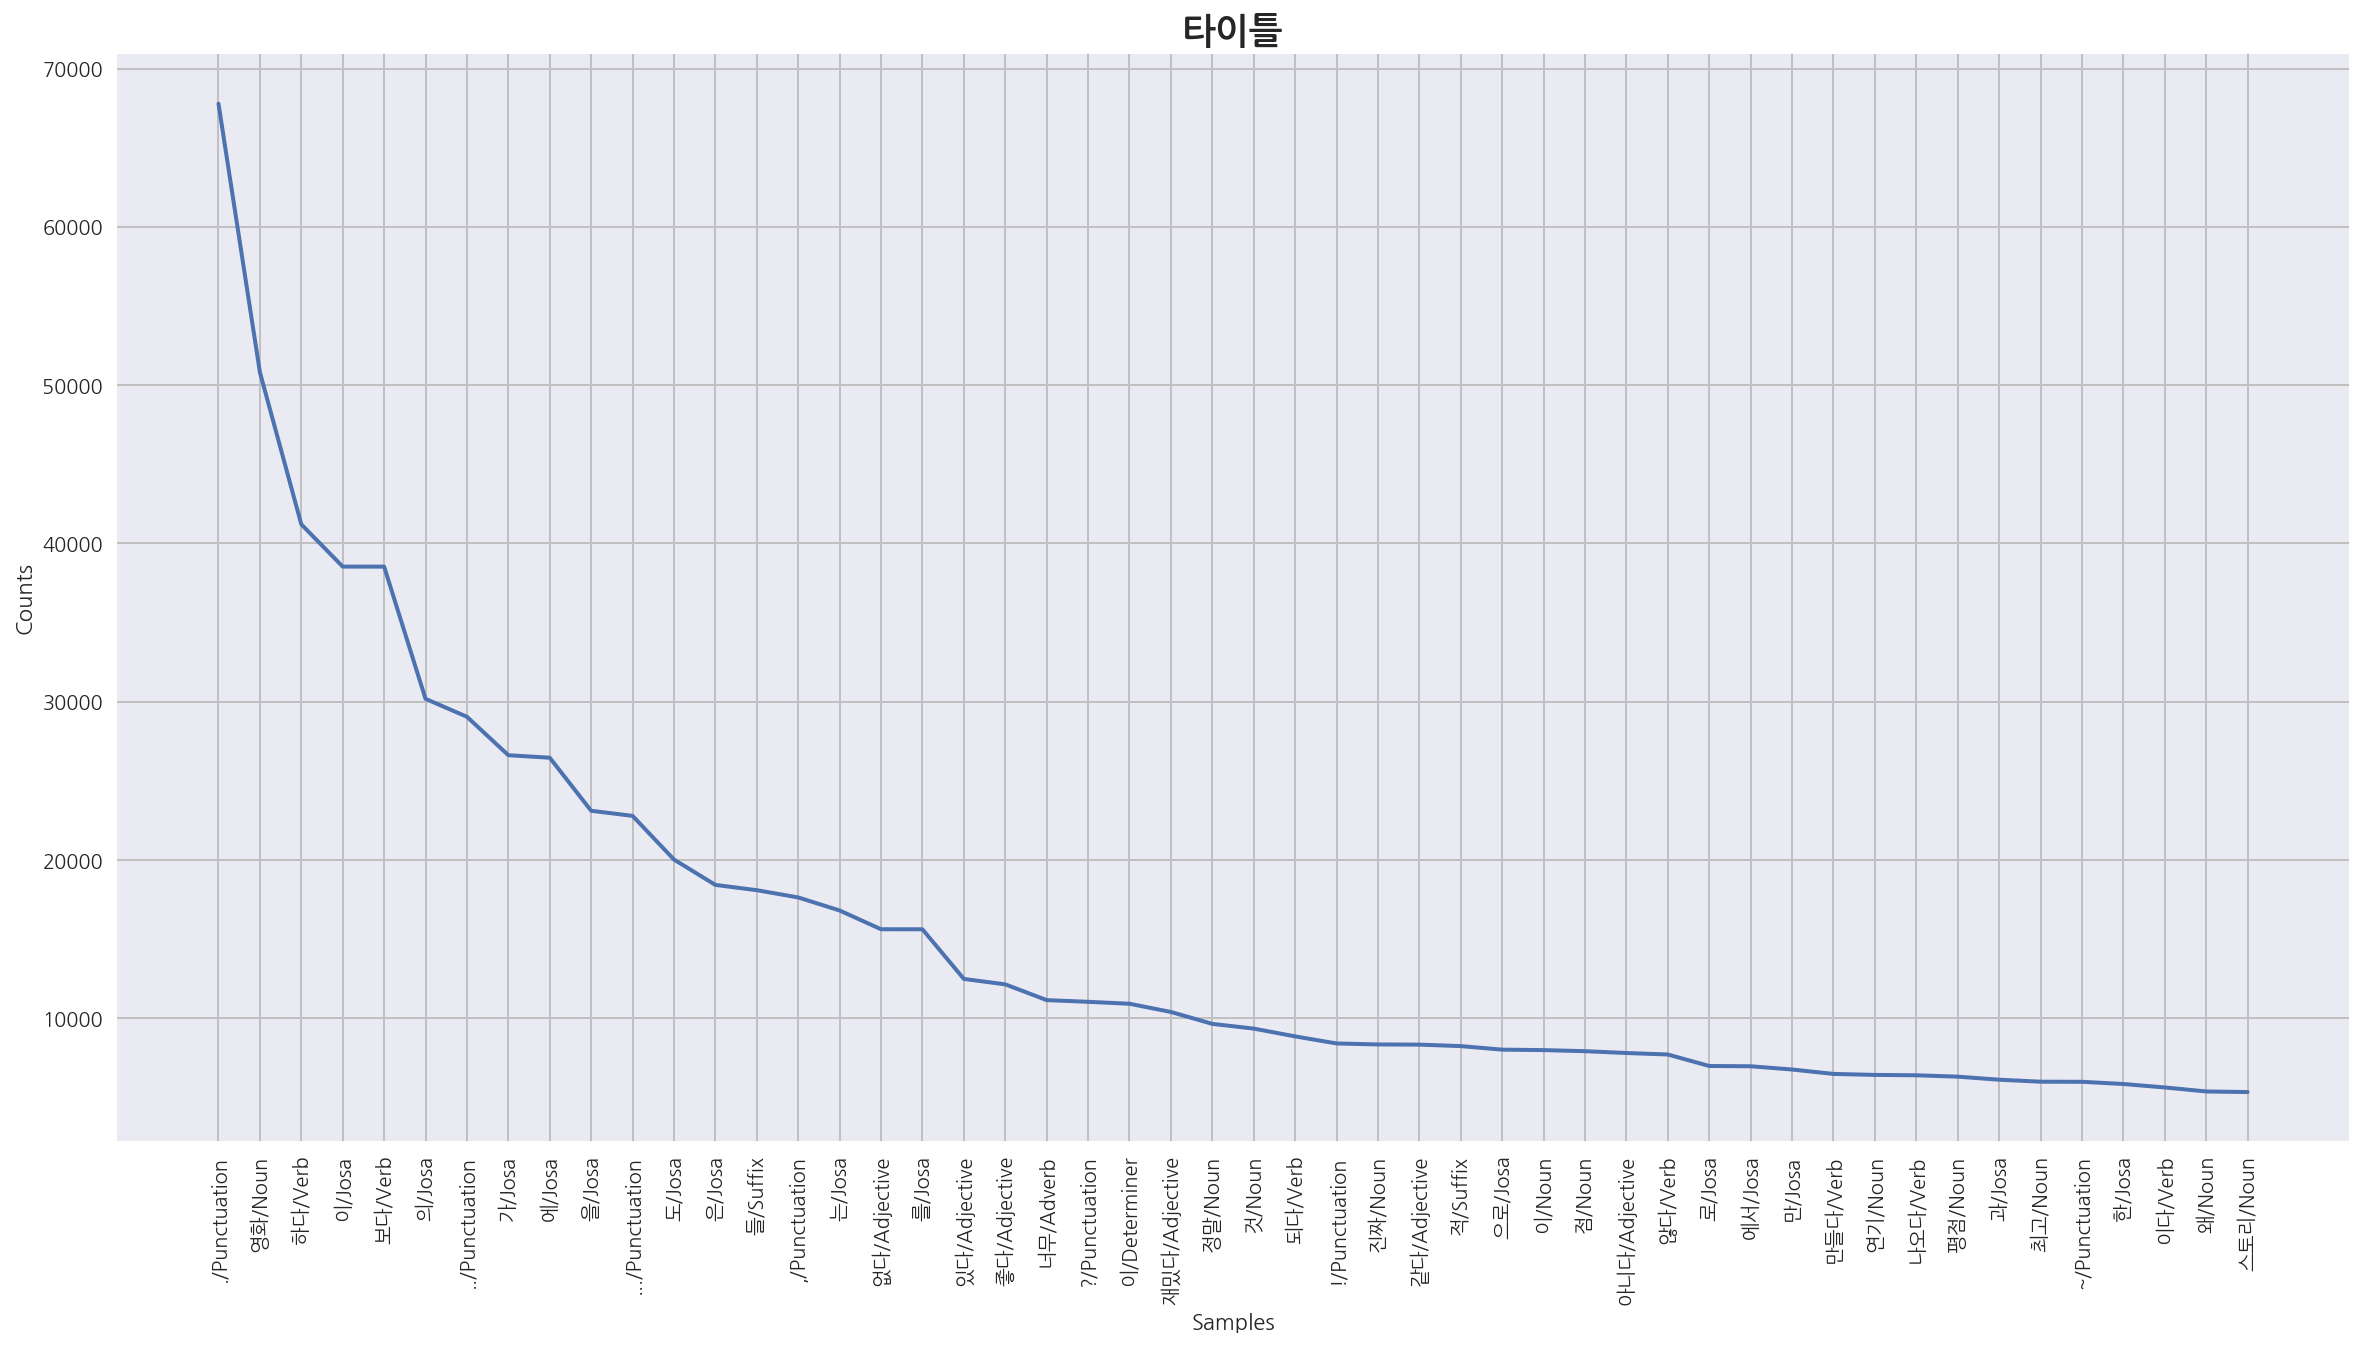

In [78]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = font_manager.FontProperties(fname=path, size=18)
rc('font', family=fontprop.get_name())

plt.figure(figsize=(20,10))

plt.title('타이틀', fontproperties=fontprop)

text.plot(50)





이제 자주 사용되는 토큰 10000개를 사용해서 데이터를 벡터화를 시키겠습니다.
여기서는 원 핫 인코딩 대신에 CountVectorization을 사용했습니다.
이는 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할을 합니다.

In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]